In [ ]:
import tweepy
from textblob import TextBlob as tb
from wordcloud import WordCloud as wc
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving login.csv to login.csv


In [ ]:
log = pd.read_csv('login.csv')

In [ ]:
consumer_key = log['key'][0]
consumer_secret = log['key'][1]
Access_token = log['key'][2]
token_secret = log['key'][3]

In [ ]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
authenticate.set_access_token(Access_token, token_secret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
posts = api.user_timeline(screen_name = 'Amazon', count= 500, lang = 'en', tweet_mode ='extended')
print("show the 5 tweets: \n")
i =1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i + 1

show the 5 tweets: 

1) @Sandeep129612 policy and we prefer to work towards correcting any inconsistencies in our processes. Please don’t provide your order details as we consider them to be personal information. Our page is visible to public. (2/2)

-Anand

2) @Sandeep129612 We apologize for the disappointment with regard to the cancellation of your order. Once the order is canceled, we won't be able to reinstate the same. We will be sure to forward this as feedback to the relevant team internally. We do not have a compensation (1/2)

-Anand

3) @Sandeep129612 You can view/cancel/ manage your subscriptions here: https://t.co/UOIayLTW0l. -Rebecca

4) @Andrew____Ryan Hi, we'd like to take a closer look at this with you. When you have a moment, please contact us here: https://t.co/YyJL5t4r2h. We're here to help in any way we can. -Brielle

5) @ArtsyStuffMaker Thank you for the additional information. When you have a free moment, please contact us here: https://t.co/YyJL5t4r2h. We'll get 

In [ ]:
df = pd.DataFrame([ tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head


<bound method NDFrame.head of                                                 Tweets
0    @Sandeep129612 policy and we prefer to work to...
1    @Sandeep129612 We apologize for the disappoint...
2    @Sandeep129612 You can view/cancel/ manage you...
3    @Andrew____Ryan Hi, we'd like to take a closer...
4    @ArtsyStuffMaker Thank you for the additional ...
..                                                 ...
195  @BuddyWaters Hi there. We want to help. Can yo...
196  @hausofpri Hello! Please view this information...
197  @w_rldstar Hello! We're terribly sorry to hear...
198  @valajigar95 We're sorry for any inconvenience...
199  @OwnedbySamoyeds We're terribly sorry to hear ...

[200 rows x 1 columns]>

In [ ]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r':|_|@', '', text)
  
 
  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

df


,Tweets
0,policy and we prefer to work towards correcti...
1,We apologize for the disappointment with rega...
2,You can view/cancel/ manage your subscription...
3,"Ryan Hi, we'd like to take a closer look at th..."
4,Thank you for the additional information. Whe...
...,...
195,Hi there. We want to help. Can you tell us mo...
196,"Hello! Please view this information ""Release ..."
197,rldstar Hello! We're terribly sorry to hear of...
198,We're sorry for any inconvenience. Could you ...


In [ ]:
def getSubjectivity(text):
  return tb(text).sentiment.subjectivity

def getPolarity(text):
  return tb(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,policy and we prefer to work towards correcti...,0.122222,-0.033333
1,We apologize for the disappointment with rega...,0.489815,0.133333
2,You can view/cancel/ manage your subscription...,0.000000,0.000000
3,"Ryan Hi, we'd like to take a closer look at th...",0.000000,0.000000
4,Thank you for the additional information. Whe...,0.650000,0.200000
...,...,...,...
195,Hi there. We want to help. Can you tell us mo...,0.500000,0.500000
196,"Hello! Please view this information ""Release ...",0.375000,-0.125000
197,rldstar Hello! We're terribly sorry to hear of...,0.833333,0.266667
198,We're sorry for any inconvenience. Could you ...,0.750000,0.000000


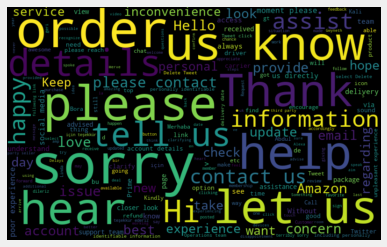

In [ ]:
#wordcloud
allWords = ''.join(tweets for tweets in df['Tweets'])
wordCloud = wc(width = 800, height = 500, random_state =12, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#creating function to compute negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis) 

df

,Tweets,Subjectivity,Polarity,Analysis
0,policy and we prefer to work towards correcti...,0.122222,-0.033333,Negative
1,We apologize for the disappointment with rega...,0.489815,0.133333,Positive
2,You can view/cancel/ manage your subscription...,0.000000,0.000000,Neutral
3,"Ryan Hi, we'd like to take a closer look at th...",0.000000,0.000000,Neutral
4,Thank you for the additional information. Whe...,0.650000,0.200000,Positive
...,...,...,...,...
195,Hi there. We want to help. Can you tell us mo...,0.500000,0.500000,Positive
196,"Hello! Please view this information ""Release ...",0.375000,-0.125000,Negative
197,rldstar Hello! We're terribly sorry to hear of...,0.833333,0.266667,Positive
198,We're sorry for any inconvenience. Could you ...,0.750000,0.000000,Neutral


In [ ]:
#print all +ve tweets
k=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Positive':
    print(str(k) + ') ' + sortedDF['Tweets'][i])
    print()
    k = k+1

1)  We apologize for the disappointment with regard to the cancellation of your order. Once the order is canceled, we won't be able to reinstate the same. We will be sure to forward this as feedback to the relevant team internally. We do not have a compensation (1/2)

-Anand

2)  Thank you for the additional information. When you have a free moment, please contact us here  We'll get this further looked into. -Kali

3)  Hi there! We're sorry to hear you're having difficulty canceling an order. Can you tell us what kind of error message you're receiving when you try to cancel. Is this on a third-party seller order? Let us know, we want to help. -Waya

4)  Thank you for clarifying. We'd like to take a closer look into your account. When you have a moment, please reach out to us directly here  -Trent

5)  Thanks for letting us know. We'd like to look into it for you. At your convenience, please send us details here  Please let us know once you've filled out the form. -Heather

6)  We under

In [ ]:
#print -ve tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'], ascending ='False')
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Negative':
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1)  policy and we prefer to work towards correcting any inconsistencies in our processes. Please don’t provide your order details as we consider them to be personal information. Our page is visible to public. (2/2)

-Anand

2)  Hi there. We're sorry for the poor experience. When you have a free moment, please check the locations listed here  Keep us posted. -Kali

3)  We're sorry for the poor experience. This is never the service we aim to provide. Please allow us an opportunity to personally escalate this further by providing us with additional details using the following link  -Jonathan

4)  Looks like you've had an unpleasant experience with us. Could you please let us know if there is any ongoing issue that went unaddressed? -Abdul

5)  Hi there. We're sorry to hear about the poor experience. You can find all return options here  We hope this helps. -Kali

6)  Hi there! We're sorry to hear this. Can you tell us which Amazon site you use (.com, .in, uk, .au, .jp, etc?). -Rebecca

7)

In [ ]:
#print neutral tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Neutral':
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1)  You can view/cancel/ manage your subscriptions here  -Rebecca

2) Ryan Hi, we'd like to take a closer look at this with you. When you have a moment, please contact us here  We're here to help in any way we can. -Brielle

3)  If it was a third-party seller order, they have a cancellation window of 30 minutes. Have you reached out to them yet? If so, what did they advise? Standing by. -Waya

4)  Merhaba! İade sürecimizden memnun kalmana sevindik. Vakit ayırıp, geri bildirimde bulunduğun için teşekkür ederiz. Sevgilerle. -Bora

5)  Merhaba Gökçe! Vakit ayırıp, geri bildirimde bulunduğun için teşekkür eder, güzel günlerde keyifli alışverişler dileriz. Sevgiler. (2/2) -Bora

6)  Sipariş ve hesap bilgilerin kişisel bilgiler olduğundan, bu detayları sosyal medyada paylaşmamanı tavsiye ediyoruz. Tweet'ini düzenlemek istersen, Tweet'in üst kısmındaki "v" veya "..." simgesine tıklayıp "Sil"i seçebilirsin. (1/2) -Bora

7)  Thank you for the update. We would advise to wait until the date given

In [ ]:
def getAnalysis(score):
  if score < 0:
    return -1.0
  elif score == 0:
    return 0.0
  else:
    return 1.0

df['Analysis'] = df['Polarity'].apply(getAnalysis) 

df

,Tweets,Subjectivity,Polarity,Analysis
0,policy and we prefer to work towards correcti...,0.122222,-0.033333,-1.0
1,We apologize for the disappointment with rega...,0.489815,0.133333,1.0
2,You can view/cancel/ manage your subscription...,0.000000,0.000000,0.0
3,"Ryan Hi, we'd like to take a closer look at th...",0.000000,0.000000,0.0
4,Thank you for the additional information. Whe...,0.650000,0.200000,1.0
...,...,...,...,...
195,Hi there. We want to help. Can you tell us mo...,0.500000,0.500000,1.0
196,"Hello! Please view this information ""Release ...",0.375000,-0.125000,-1.0
197,rldstar Hello! We're terribly sorry to hear of...,0.833333,0.266667,1.0
198,We're sorry for any inconvenience. Could you ...,0.750000,0.000000,0.0


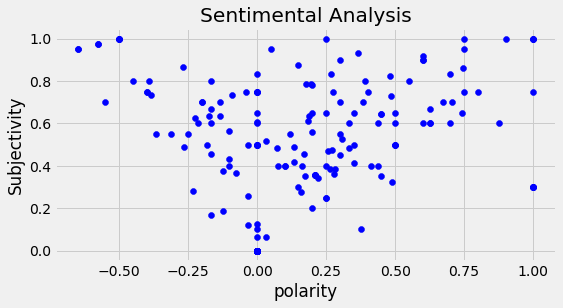

In [ ]:
#plot the polarity and subjectivity

plt.figure(figsize=(8,4))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color ='Blue')

plt.title('Sentimental Analysis')
plt.xlabel('polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#get percentage of +ve tweets
ptweets = df[df.Analysis ==1.0]
ptweets = ptweets['Tweets']

round(( ptweets.shape[0] / df.shape[0])*100 ,1) 

49.5

In [ ]:
#get percent of -ve tweets
ntweets = df[df.Analysis == -1.0]
ntweets = ntweets['Tweets']

round(( ntweets.shape[0] / df.shape[0])*100 ,1) 

22.5

In [ ]:
#get percent 
Ntweets = df[df.Analysis == 0.0]
Ntweets = Ntweets['Tweets']

round(( Ntweets.shape[0] / df.shape[0])*100,1) 

28.0

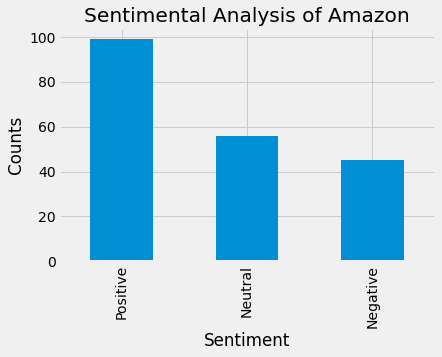

In [ ]:
#show value
df['Analysis'].value_counts()
#plot
plt.title('Sentimental Analysis of Amazon')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
!pip install treeinterpreter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import svm
from sklearn.svm import SVR 

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
X = df.drop(["Tweets"],axis = 1)
#X = df.drop("Tweets", axis=1)
y = df["Analysis"]

In [ ]:
4!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=b8b688f6dfd43c1b76d120f7d221b6852a96e8aff68104d23408f0dcfafad516
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)
from sklearn.linear_model import LinearRegression as lr


In [ ]:
 #fit the train and test 
 log = lr()
 log.fit(X_train, y_train)


LinearRegression()

In [ ]:
pred = log.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score 


In [ ]:
log.score(X_test, y_pred)*100

100.0

len(X_train),len(X_test)

In [ ]:
len(y_train),len(y_test)

(160, 40)

In [ ]:
X_train

,Subjectivity,Polarity
108,0.000000,0.000
107,0.833333,0.700
189,0.125000,0.000
14,0.400000,0.100
56,0.666667,0.625
...,...,...
133,0.400000,0.075
137,0.000000,0.000
72,0.000000,0.000
140,0.750000,-0.400


In [ ]:
X_test

,Subjectivity,Polarity,Analysis
58,0.000000,0.000000,0.0
40,0.454545,0.136364,1.0
34,1.000000,1.000000,1.0
102,0.540000,0.160000,1.0
184,0.000000,0.000000,0.0
198,0.520649,0.325552,1.0
95,0.000000,0.000000,0.0
4,0.000000,0.000000,0.0
29,0.650000,0.350000,1.0
168,0.000000,0.000000,0.0
